In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import random as rd
from sklearn import neighbors
import sklearn
import time
from sklearn.cluster import KMeans

start=time.time()

mat = scipy.io.loadmat('mnist-original.mat') # lecture du fichier
data = np.transpose(mat['data'])
label = np.transpose(mat['label'])
X = [data[i].reshape(28,28) for i in range(len(data)) ] # on créé une nouvelle liste qui va contenir nos matrices 28x28

def index_chiffre(n, y):  # elle nous renvoie un tableau contenant les indices représentants le chiffre n
    return [i for i in range(len(y)) if y[i]==n] 

def image_moyenne(n, X, y): # cette fonction renvoie la matrice moyenne (centroïde) pour le chiffre n
    index = index_chiffre(n, y) 
    sum_matrice = np.zeros((28,28)) # la matrice qui sera utilisée dans la somme
    for i in index:
        sum_matrice += X[i] # on somme toutes les matrices représentants le chiffre n
    return sum_matrice/len(index)

def distance(x,y,k): # fonction qui calcule la distance entre deux matrices 
    x = x.reshape(len(x)**2) # x est une matrice carré de "longueur" n donc sa représentation en vecteur sera de taille n*n
    y = y.reshape(len(y)**2)
    return np.linalg.norm(x-y,k)

def prediction(x,centroide, n, k,h):# on va chercher le centroïde le plus proche de la matrice X_n où n est l'indice de la matrice
    l=[distance(x[n], centroide[i],k) for i in range(10*h)]
    k= l.index(min(l))
    z=k%h
    return float((k-z)/h)

def calcul_pourcentage(n,h):# renvoie le pourcentage de reussite n représente l'ordre de la norme qu'on va choisir
    prediction_l = [ prediction(X_test,centroide_train, i, n,h) for i in range(len(X_test)) ]
    A =[i for i,j in zip(y_test,prediction_l) if i==j]
    return(len(A)*100/len(X_test))


X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2,random_state=59)



end=time.time()
print(end-start)

0.09707975387573242


In [2]:
def centro(nombre):
    chiffres = range(10)
    nb_clusters = nombre
    centre_=[]
    for j,t in zip(range(len(chiffres)),chiffres):
        idx = np.where((label == t))[0]
        Xk = np.array(data)[idx]    
        Ykk = np.array(label)[idx]
        Yk = np.reshape(Ykk, (len(Ykk),))
        kmeans = sklearn.cluster.KMeans(n_clusters=nb_clusters).fit(Xk,Yk)
        centroidk = kmeans.cluster_centers_
        for i in range(nb_clusters):
            centre_.append(centroidk[i])
    return centre_

In [9]:
nombre=20
opo=[]
for i in range(2,nombre):
    centr=centro(i)
    centroide_train = [centr[j].reshape(28,28) for j in range(10*i)]
    opo.append(calcul_pourcentage(3,i))
    
    

In [10]:
opo

[86.82142857142857,
 88.8,
 89.99285714285715,
 90.87857142857143,
 91.47142857142858,
 91.97142857142858,
 92.5,
 92.76428571428572,
 93.25714285714285,
 93.47857142857143,
 93.59285714285714,
 93.67142857142858,
 93.86428571428571,
 93.92142857142858,
 94.0,
 94.24285714285715,
 94.02857142857142,
 94.34285714285714]

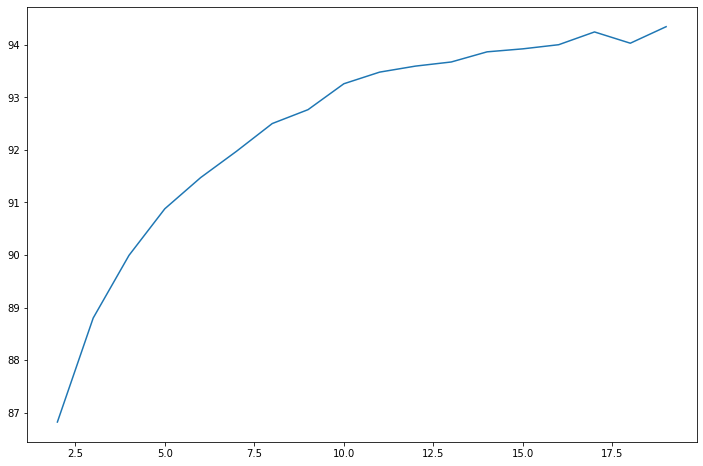

In [11]:
plt.figure(figsize=(12,8))     
plt.plot([i+2 for i in range(len(opo))],opo)
plt.show()

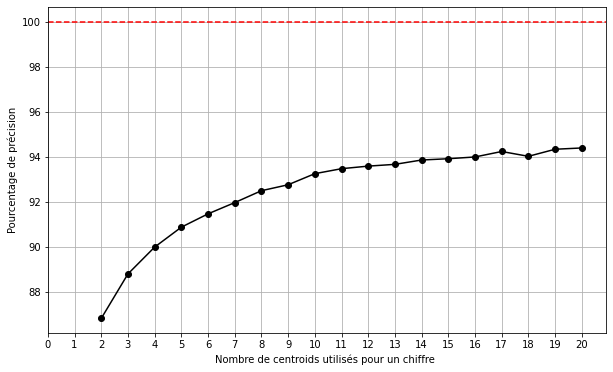

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot([i+2 for i in range(len(opo))],opo, '-o', c='black')
ax.axhline(y=100, ls='--' ,c='red')
ax.set_xlabel('Nombre de centroids utilisés pour un chiffre ')
ax.set_xticks(list(range(21)))
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Pourcentage de précision')
ax.grid()
plt.show()

In [16]:
centr=centro(21)
centroide_train = [centr[j].reshape(28,28) for j in range(10*21)]
print(calcul_pourcentage(3,21))

94.4


In [17]:
opo.append(94.4)

In [20]:
centr=centro(22)
centroide_train = [centr[j].reshape(28,28) for j in range(10*22)]
print(calcul_pourcentage(3,22))
opo.append(calcul_pourcentage(3,22))

94.28571428571429


In [22]:
for i in range(1,10):
    centr=centro(i+22)
    centroide_train = [centr[j].reshape(28,28) for j in range(10*(22+i))]
    opo.append(calcul_pourcentage(3,22+i))

In [23]:
len(opo)

29

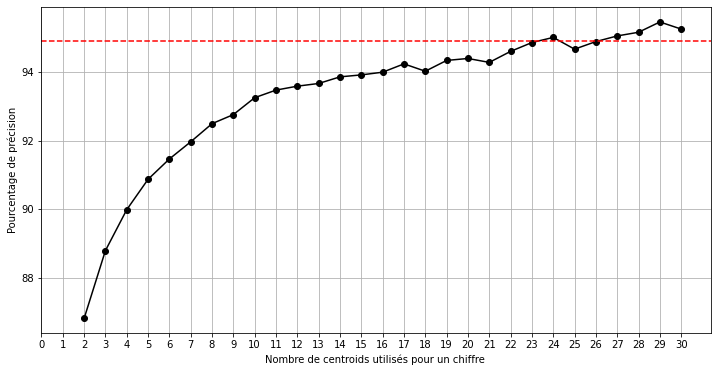

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot([i+2 for i in range(len(opo))],opo, '-o', c='black')
ax.axhline(y=94.92, ls='--' ,c='red')
ax.set_xlabel('Nombre de centroids utilisés pour un chiffre ')
ax.set_xticks(list(range(31)))
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Pourcentage de précision')
ax.grid()
plt.show()

In [8]:
start=time.time()
print(calcul_pourcentage(3))
end=time.time()
print(end-start)

90.0
15.202574253082275


In [106]:
pourcentage=[calcul_pourcentage(i) for i in (range(1,15))]

In [112]:
pourcentage[3]

87.92142857142858

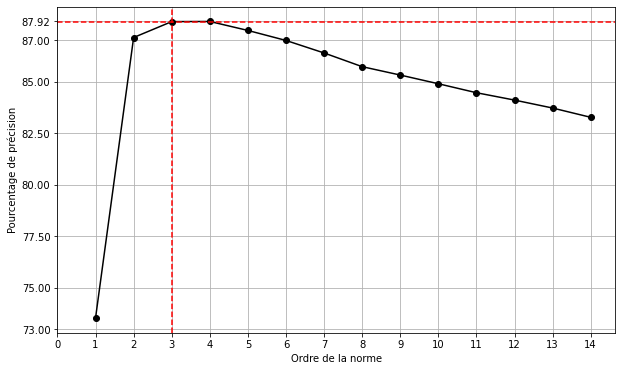

In [113]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(list(range(1,15)), pourcentage, '-o', c='black')
ax.axhline(y=pourcentage[2], ls='--' ,c='red')
ax.axvline(x=3, ls='--', c='red', ymin=0, ymax=pourcentage[2])
ax.set_xlabel('Ordre de la norme')
ax.set_xticks(list(range(15)))
ax.set_yticks([73,75.0,77.5,80.0,82.5,85.0,87,87.92])
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Pourcentage de précision')
ax.grid()
plt.savefig('Centroide_Ordre_Prec')
plt.show()

In [32]:
print(len(X_test))

14000


9.744256019592285


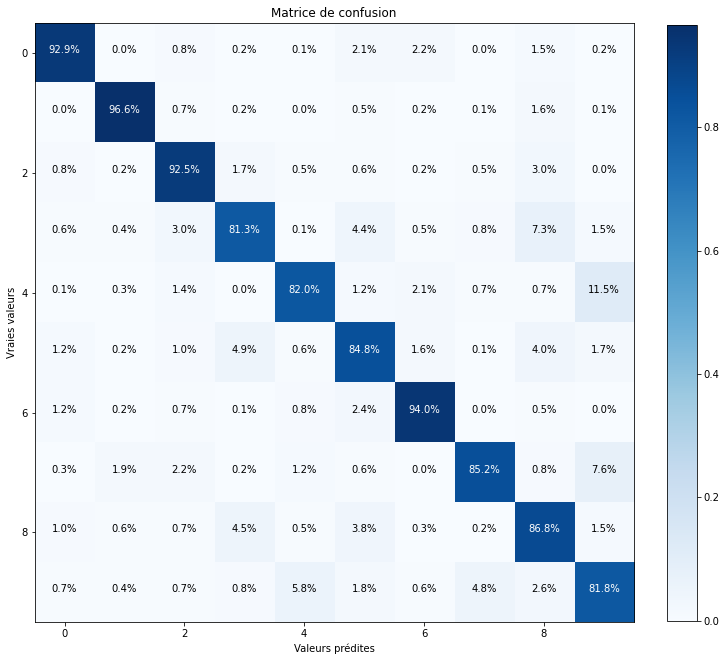

[92.91784702549575,
 96.63970130678283,
 92.45147375988498,
 81.30774697938877,
 82.00290275761974,
 84.8363926576217,
 94.04125286478228,
 85.23676880222841,
 86.80351906158357,
 81.84338184338185,
 9.744256019592285]

In [105]:
start=time.time()
ncm = confusion_matrix(y_test,[prediction(X_test,centroide_train,i,3) for i in range(len(y_test))], normalize = 'true')
end=time.time()
print(end-start)
plt.figure(figsize=(10,10))
plt.imshow(ncm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar(fraction= 0.045)
    
fmt = ".1%"
thresh = ncm.max()/2.
for i, j in itertools.product(range(ncm.shape[0]), range(ncm.shape[1])):
    plt.text(j,i,format(ncm[i,j], fmt), horizontalalignment="center",color="white" if ncm[i,j]> thresh else "black")
        
        
plt.tight_layout()
plt.ylabel('Vraies valeurs')
plt.xlabel('Valeurs prédites')
plt.show()



L3=[ncm[i][i] for i in range(10)]
L3=[100*i for i in L3]
L3.append(end-start)
L3

9.474764823913574


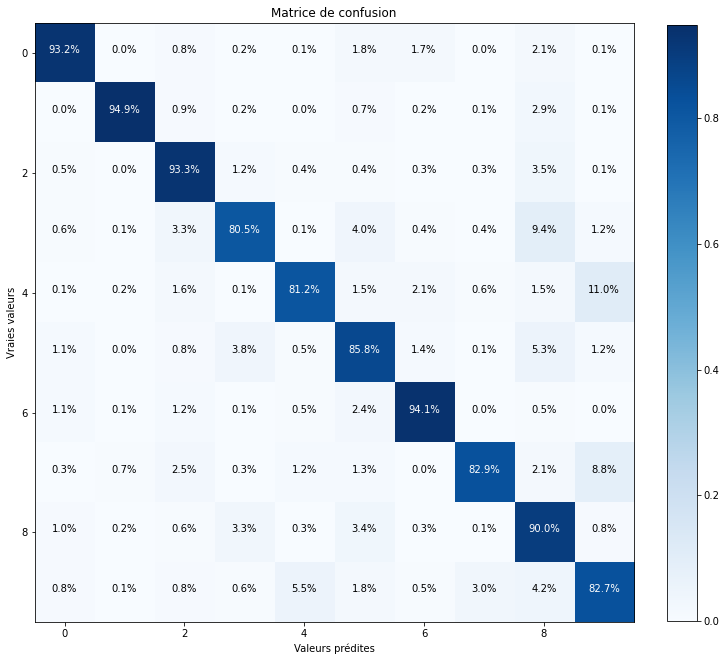

[93.20113314447592,
 94.89732420659614,
 93.31416247304098,
 80.45486851457001,
 81.20464441219158,
 85.79409417398244,
 94.11764705882352,
 82.8690807799443,
 90.02932551319648,
 82.74428274428274,
 9.474764823913574]

In [114]:
start=time.time()
ncm = confusion_matrix(y_test,[prediction(X_test,centroide_train,i,4) for i in range(len(y_test))], normalize = 'true')
end=time.time()
print(end-start)
plt.figure(figsize=(10,10))
plt.imshow(ncm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar(fraction= 0.045)
    
fmt = ".1%"
thresh = ncm.max()/2.
for i, j in itertools.product(range(ncm.shape[0]), range(ncm.shape[1])):
    plt.text(j,i,format(ncm[i,j], fmt), horizontalalignment="center",color="white" if ncm[i,j]> thresh else "black")
        
        
plt.tight_layout()
plt.ylabel('Vraies valeurs')
plt.xlabel('Valeurs prédites')
plt.show()



L4=[ncm[i][i] for i in range(10)]
L4=[100*i for i in L4]
L4.append(end-start)
L4